<div style="font-family: Arial, sans-serif; text-align: center;">

# CodSoft Project 3


# Iris Flower Classification.


</div>


In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report    
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import category_encoders as ce


<div style="font-family: Arial, sans-serif; text-align: center;">

## Data Exploration

</div>

In [28]:
df= pd.read_csv("C:\\data science\\CodeSoft Internship\\Iris flower dataset\\IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
df.shape

(150, 5)

In [30]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64



<div style="font-family: Arial, sans-serif; text-align: center;">

## Data Visualization

</div>

C:\Users\ahzam\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


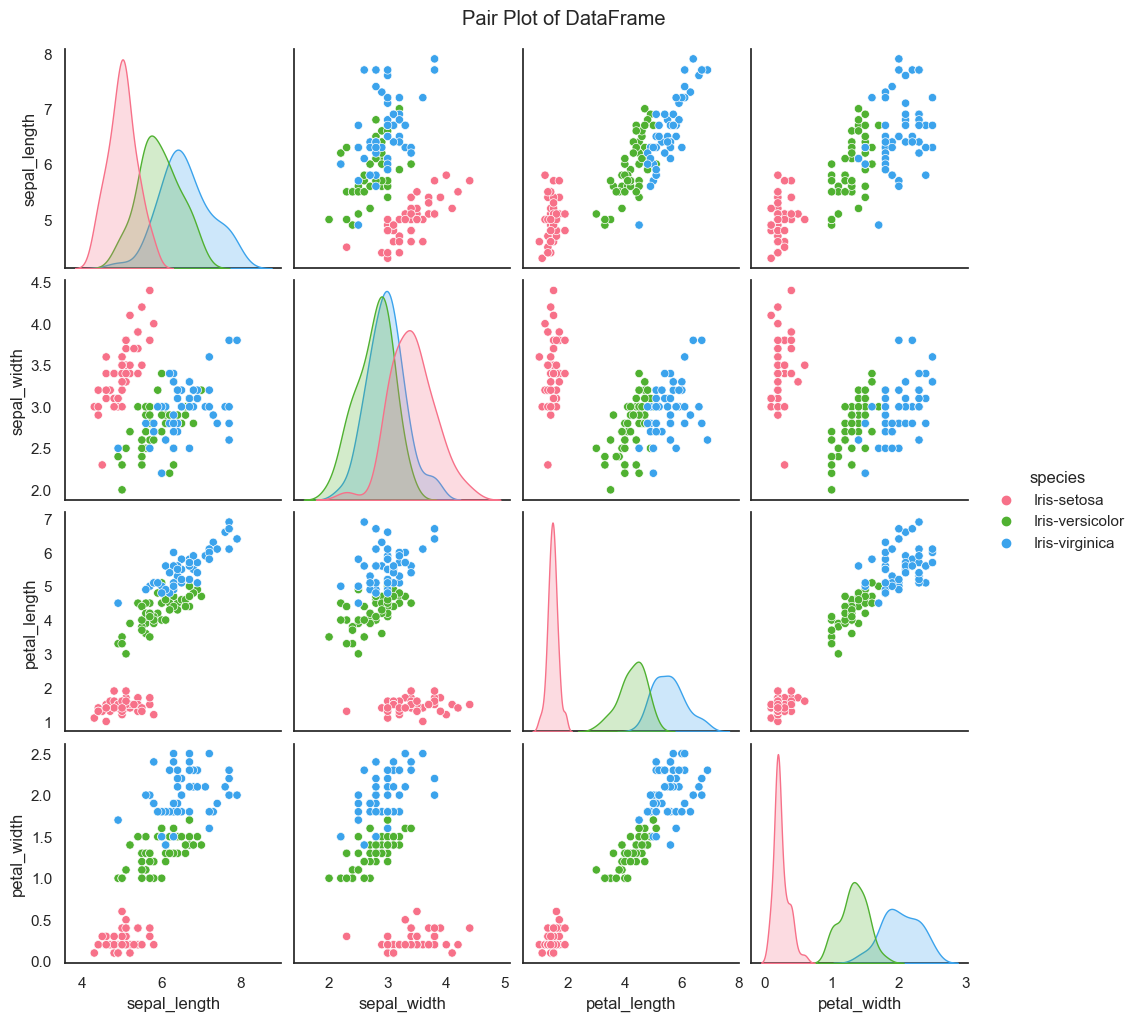

In [32]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

num_unique_values = df['species'].nunique()

# Customize the pair plot
sns.set(style="white")  # Set the background style

custom_palette = sns.color_palette("husl", n_colors=num_unique_values)
sns.pairplot(df, diag_kind="kde", palette=custom_palette, markers='o', hue='species')

# Add a title
plt.suptitle("Pair Plot of DataFrame", y=1.02)
plt.show()

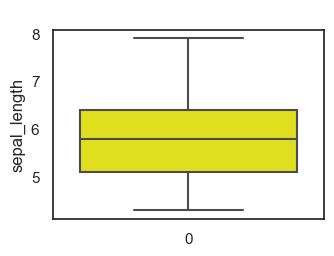

In [33]:
plt.subplot(2,2,1)
sns.boxplot(df['sepal_length'],color='yellow')
plt.title(" ")
plt.ylabel("sepal_length")
plt.tight_layout()
plt.show()

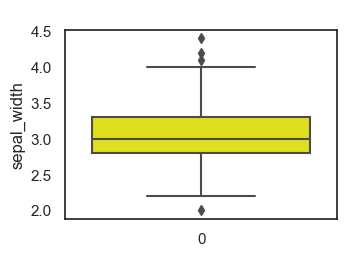

In [34]:
plt.subplot(2,2,2)
sns.boxplot(df['sepal_width'],color='yellow')
plt.title(" ")
plt.ylabel("sepal_width")
plt.tight_layout()
plt.show()

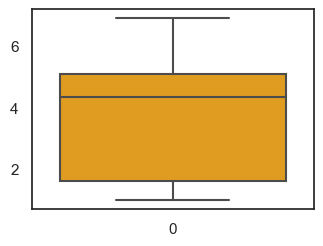

In [35]:
plt.subplot(2,2,3)
sns.boxplot(df['petal_length'],color='orange')

plt.tight_layout()
plt.show()

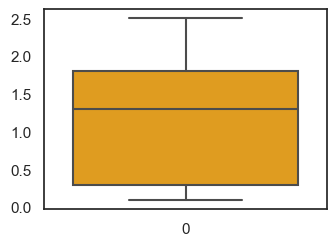

In [36]:
plt.subplot(2,2,4)
sns.boxplot(df['petal_width'],color='orange')

plt.tight_layout()
plt.show()

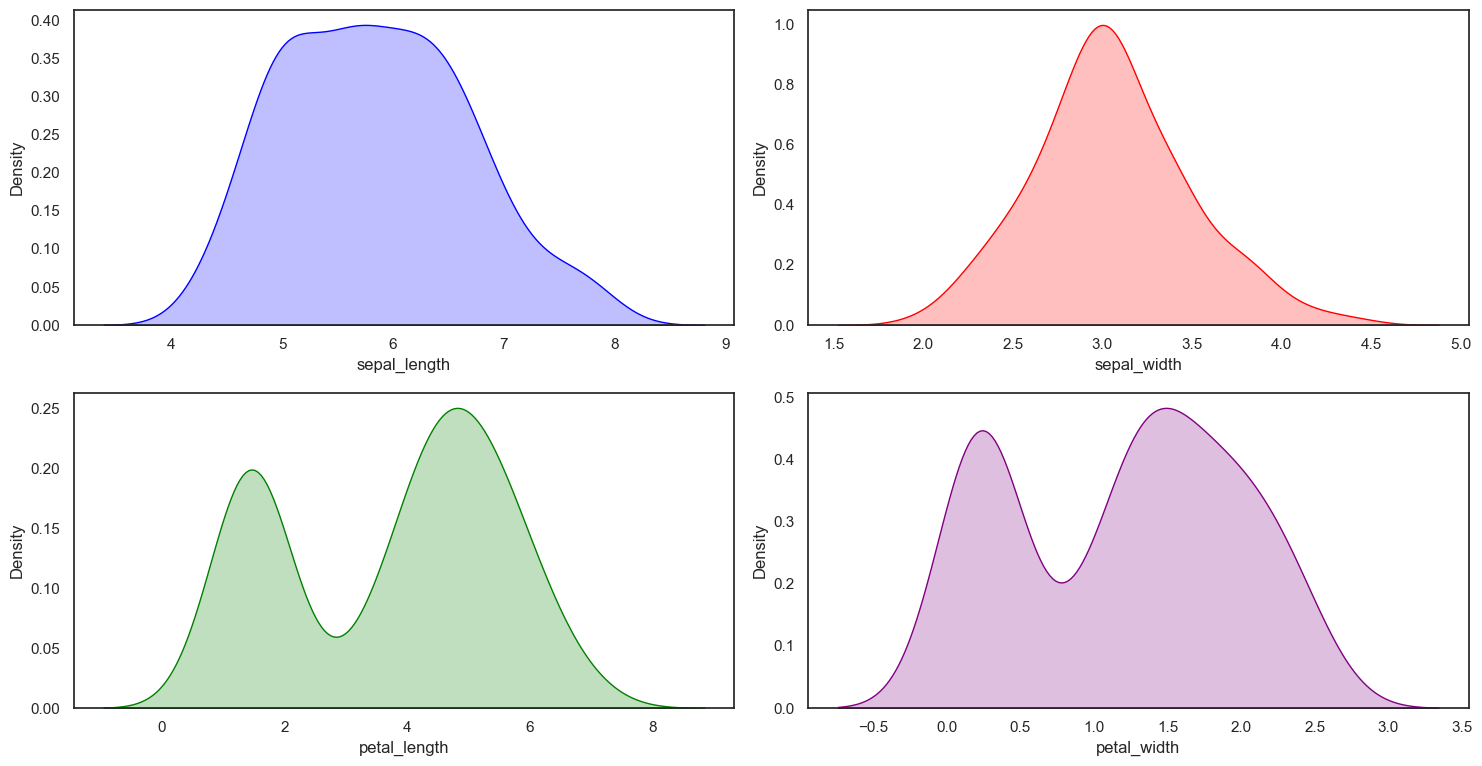

In [37]:

# Assuming df is your DataFrame

plt.figure(figsize=(15, 15))

# KDE plot for sepal_length with a specified color
plt.subplot(4, 2, 1)
sns.kdeplot(data=df, x='sepal_length', fill=True, color='blue')
plt.xlabel('sepal_length')

# KDE plot for sepal_width with a specified color
plt.subplot(4, 2, 2)
sns.kdeplot(data=df, x='sepal_width', fill=True, color='red')
plt.xlabel('sepal_width')

# KDE plot for petal_length with a specified color
plt.subplot(4, 2, 3)
sns.kdeplot(data=df, x='petal_length', fill=True, color='green')
plt.xlabel('petal_length')

# KDE plot for petal_width with a specified color
plt.subplot(4, 2, 4)
sns.kdeplot(data=df, x='petal_width', fill=True, color='purple')
plt.xlabel('petal_width')

plt.tight_layout()
plt.show()



<div style="font-family: Arial, sans-serif; text-align: center;">

## Refinement

</div>

In [38]:
categorical_columns= ['species']
target_encoders = ce.TargetEncoder(cols=['species'])
encoded_df = round(target_encoders.fit_transform(df['species'],df['sepal_length']),0)
encoded_df.head()


,species
0,5.0
1,5.0
2,5.0
3,5.0
4,5.0


In [39]:
encoded_df['species'].unique()

array([5., 6., 7.])

In [40]:
df.drop(['species'],axis=1,inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:
updated_df = pd.concat([df,encoded_df],axis=1)
updated_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,5.0
1,4.9,3.0,1.4,0.2,5.0
2,4.7,3.2,1.3,0.2,5.0
3,4.6,3.1,1.5,0.2,5.0
4,5.0,3.6,1.4,0.2,5.0


In [42]:
X= updated_df.drop(['species'],axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
Y = updated_df['species']
Y.head()
Y.unique()

array([5., 6., 7.])

In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print("The shape of training features : ",X_train.shape)
print("The shape of training target : ",Y_train.shape)
print("The shape of testing features : ",X_test.shape)
print("The shape of testing target : ",Y_test.shape)


The shape of training features :  (120, 4)
The shape of training target :  (120,)
The shape of testing features :  (30, 4)
The shape of testing target :  (30,)



<div style="font-family: Arial, sans-serif; text-align: center;">

## Models Implementation

</div>


<div style="font-family: Arial, sans-serif; text-align: center;">

### Logistic Regression

</div>

In [45]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
lr_pred = lr.predict(X_test)

In [46]:
result = classification_report(Y_test,lr_pred)
print(result)

              precision    recall  f1-score   support

         5.0       1.00      1.00      1.00        10
         6.0       1.00      1.00      1.00         9
         7.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30




<div style="font-family: Arial, sans-serif; text-align: center;">

### Random Forest Classifier

</div>

In [47]:
rc = RandomForestClassifier()
rc.fit(X_train,Y_train)
rc_pred= rc.predict(X_test)

In [48]:
print(classification_report(Y_test,rc_pred))

              precision    recall  f1-score   support

         5.0       1.00      1.00      1.00        10
         6.0       1.00      1.00      1.00         9
         7.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<div style="font-family: Arial, sans-serif; text-align: center;">

### Decision Tree Classifier

</div>

In [49]:
dc = DecisionTreeClassifier()
dc.fit(X_train,Y_train)
dc_pred = dc.predict(X_test)

In [50]:
print(classification_report(Y_test,dc_pred))

              precision    recall  f1-score   support

         5.0       1.00      1.00      1.00        10
         6.0       1.00      1.00      1.00         9
         7.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<div style="font-family: Arial, sans-serif; text-align: center;">

### Support Vector Machine Classifier

</div>

In [51]:
svc = SVC()
svc.fit(X_train,Y_train)
svc_pred = svc.predict(X_test)

In [52]:
print(classification_report(Y_test,svc_pred))

              precision    recall  f1-score   support

         5.0       1.00      1.00      1.00        10
         6.0       1.00      1.00      1.00         9
         7.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

